<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/09_01_DijointSets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disjoint set / Union-Find

## Weighted Union + Path Compression

In [1]:
class DisjointSet:
  # todos los métodos tiene el parametro oculto self
  # self === this
  # Constructor!
  def __init__(self, n):
    self.S = [-1]*n

  ## Acuerdo de personas honorables: __algo: privado, _algo: protegido, algo: publico.
  def find(self, x):
    if self.S[x] < 0:
      return x
    p = self.find(self.S[x])
    self.S[x] = p
    return p

  def union(self, x, y):
    Xr = self.find(x)
    Yr = self.find(y)
    if Xr != Yr:
      if self.S[Xr] < self.S[Yr]:
        self.S[Xr] += self.S[Yr]
        self.S[Yr] = Xr
      else:
        self.S[Yr] += self.S[Xr]
        self.S[Xr] = Yr

  def isSameSet(self, x, y):
    return self.find(x) == self.find(y)

In [2]:
import graphviz as gv

def show(ds):
  s = ds.S
  n = len(s)
  G = gv.Digraph("merry")
  G.graph_attr["rankdir"] = "BT"
  for u in range(n):
    G.node(str(u))
  for u, parent in enumerate(s):
    if parent >= 0:
      G.edge(str(u), str(parent))
  return G

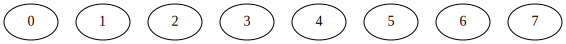

In [3]:
ds = DisjointSet(8)
show(ds)

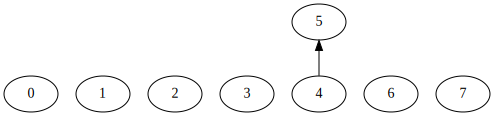

In [4]:
ds.union(4, 5)
show(ds)

In [5]:
ds.union(5, 0)
show(ds)

In [6]:
ds.union(3, 2)
show(ds)

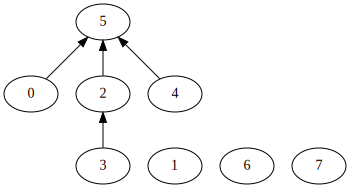

In [7]:
ds.union(3, 0)
show(ds)

In [8]:
ds.union(1, 6)
show(ds)

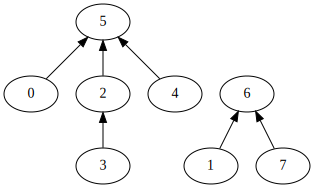

In [9]:
ds.union(1, 7)
show(ds)

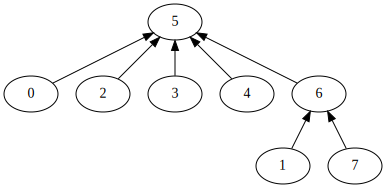

In [10]:
ds.union(7, 3)
show(ds)